## Linear Regression Part 5: Vectorization and Matrix Equations

We've covered a lot of fundamentals in the last 4 posts about Linear Regression and in this post we will cover another important idea, "Vectorization". In this context we will rewrite the equations for Linear Regression in matrix/vector form and derive the direct/exact solution to find the model parameters by solving a simple matrix equation. We will also generalize the linear regression problem to multiple feature variables, **Multi-Variate Linear Regression**. This is a natural extension from expressing the equations in matrix form.

>In the paragraph above I used the word **"simple"** in regard to the matrix equations. I should qualify that! **Everything is simple when you know how to do it!** This post is a bit more advanced than the previous posts since it is using some linear algebra. **[Linear algebra](https://en.wikipedia.org/wiki/Category:Linear_algebra)** is one of the important corner-stones of understanding machine learning, and actually, is a corner-stone of nearly all numerical computing.    

The basic mathematics prerequisites for understanding Machine Learning are Calculus-I,II,III, Linear Algebra, and, Probability and Statistics. A computer science student that is interested in Machine Learning would be well advised to get a minor in Mathematics (or just get a degree in Mathematics instead!) You don't need to know these subjects at the level of a mathematician rather more like an engineer. This is especially true for linear algebra. Linear algebra is a great first course for a theorem proving course (real mathematics). What is needed for machine learning and a computer scientist is more like "applied numerical linear algebra".

>You don't need to understand all of the math used in this post! The main take-aways are the finial equations and the "idea" of rewriting formulas in matrix vector form. You can think of vectors and matrices as "programming data structures" and then realize how they are used by libraries like numpy.    

If you don't have much mathematics background don't be intimidated by the statements above! It's not that hard and you can learn a lot by just following along as best you can. I wont explain everything in detail but will try to give insight into what's going on.

For background the previous 4 posts contain a lots of good stuff!

- [Linear Regression Part1: Introduction](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-1-954/)
- [Linear Regression Part2: Getting and Evaluating Data](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-2-963/)
- [Linear Regression Part3: Model and Cost Function](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/)
- [Linear Regression Part 4: Parameter Optimization by Gradient Descent](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-4-968/)

These posts along with the current one were converted to html from Jupyter notebooks. The notebooks are available at [https://github.com/dbkinghorn/blog-jupyter-notebooks](https://github.com/dbkinghorn/blog-jupyter-notebooks)


### Scalars, Vectors, Matrices and some Operations with them

Here is very brief (and inadequate!) introduction to some of the structures and operations in linear algebra.

#### Scalar
A scalar is just a single number. For example,
$$ \alpha = 2 $$

#### Vector
A vector is a column array of scalars. It has 1 index ($a_1$ is the first element of $a$, -- or maybe that could be $a_0$!)

$$ a = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix} $$

where $a_1$ and $a_2$ are scalars.
#### Matrix
A matrix is a 2 dimensional array. The following matrix has 2 rows and 2 columns. You can think of the columns as vectors.

$$ A = \begin{bmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{bmatrix} $$

A matrix has 2 index values ($i,j$). The "1,2 element" of $A$ is $a_{12}$"
#### Dimensions
We would say the the matrix $A$ is a "2 by 2" or $2 \times 2$ matrix. In general it could be $n \times m$ i.e. $n$ by $m$, where are $n$ and $m$ are scalars. The vector $a$ is "a 2 vector" i.e. has length 2. You could also think of it as a 2 by 1 matrix.
#### Transpose
The transpose of a vector or matrix has it's "indices switched". It is usuall written as a superscript $'$ or $T$. For example,

$$ a' = \begin{bmatrix} a_1 & a_2 \end{bmatrix} $$
and

$$ A' =  \begin{bmatrix} a_{11} & a_{21}\\ a_{12} & a_{22} \end{bmatrix} $$

The elements around the diagonal of $A$ are switched. In general $A' \ne A$.
#### Multiplication
Scalars , vectors and matrices can be multiplied.

$$ \alpha a' = \begin{bmatrix} \alpha a_1 & \alpha a_2 \end{bmatrix} $$

Matrices and vectors are multiplied so that each element of the result is a "row times column with the result summed". The following vector product is also called a vector "dot" product

$$ a' b = \begin{bmatrix} a_{1} & a_{2} \end{bmatrix}\begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix} = a_1 b_1 + a_2 b_2$$

The "1 by 2" row vector $a$ times the "2 by 1" column vector $b$ is the "1 by 1" scalar $a_1 b_1 + a_2 b_2$.

$$ A B  = \begin{bmatrix} a_{11} & a_{21}\\ a_{12} & a_{22} \end{bmatrix}
          \begin{bmatrix} b_{11} & b_{21}\\ b_{12} & b_{22} \end{bmatrix} =
          \begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\  a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} \end{bmatrix} $$

For matrices think "row times column summed" for each element of the result matrix.
#### Operation Dimensions
When you perform operations with vectors and matrices you need to keep their "dimensions" in mind. For conventional matrix multiplication **the inner dimensions must be conformable**. For example you can multiply a $1 \times 2$ vector with a $2 \times 3$ matrix and the result would be a $ 1 \times 3$ dimensional vector. You can multiply a matrix or vector by a scalar element-wise and you can add a scalar to a matrix or vector element-wise. You can also add 2 vectors or matrices element-wise if they have the same dimensions.

You have to be careful when using matrices and vectors. It's always good to check your work by looking at the dimensions of all operations to be sure you haven't forgotten a transpose or something. A couple of other characteristics to be aware of is that matrix multiplication is not commutative, that is, in general $AB \neq BA$ and the transpose or inverse of a product may not be what you think, $(AB)' = B'A'$ and $(AB)^{-1} = B^{-1}A^{-1}$

That is not enough explanation! If you understand the above you are set, if not, then you might want to look at some of the [great Wikipedia pages](https://en.wikipedia.org/wiki/Category:Linear_algebra).  


## Vectorizing the Linear Regression Model and Cost Function

### Model function in matrix/vector form
We have been thinking of our model function in two ways. One was as our "predictor equation",

$$ h(x) = a_0 + a_1 x$$

where, given the optimal values for $a_0, a_1$ we can use $h(x)$ as a predictor for the value of a house of size $x$ sqft.  The other way we were looking at $h(x)$ was in terms of our data set,

$$h_a(x^{(i)}) = a_0 + a_1 x^{(i)} $$

where we were considering the $i^{th}$ element in our housing data set. Recall we use $m$ for the number of elements in our dataset so the complete column of values $x$ (and thus $h(x)$) are vectors with $m$ elements.

We can consider $h(x)$ as a vector valued function of the complete column of $m$ numbers that are house sizes in our dataset i.e. $x$ is a vector of house sizes. We had also introduced $a$ as being a 2 vector containing the parameters $a_0, a_1$. So, without using any special change in notation we can think of $h$ as a vector function of $x$.

$$ h_a(x) = a_0 + a_1 x = \begin{bmatrix} 1 & x^{(1)} \\ 1 & x^{(2)} \\ \vdots & \vdots
\\ 1 & x^{(m)} \end{bmatrix}
\begin{bmatrix} a_{0} \\ a_{1} \end{bmatrix} =
\begin{bmatrix} a_0 + a_1 x^{(1)} \\ a_0 + a_1 x^{(2)}  \\ \vdots
\\ a_0 + a_1 x^{(m)} \end{bmatrix}  = X a $$

##### Matrix form of model across the full column of feature data,

$$ \bbox[25px,border:2px solid green]{ h_a(X) = Xa } $$

I have introduced the **"augmented matrix" $X$** that has a column of 1's to take care of the constant term $a_0$. The model function $h$ on the full set of training data is now just a simple matrix vector multiplication!

### Cost function in matrix/vector form
We originally wrote our cost function as the sum of squared errors between the model function and the dataset values for the house prices $y$.

$$ J(a_0, a_1) = \frac{1}{2m} \sum_{i=1}^{m}((a_0 + a_1x^{(i)}) - y^{(i)})^2  $$

A sum of squares is know as a "quadratic form" and we can write it in matrix form using the vector expression for $h_a(X)$ and the full column vector of house prices $y$. This will replace the summation, $\Sigma$, with matrix/vector multiplication.
##### Matrix form of the cost function,

$$ \bbox[25px,border:2px solid green]{
  \begin{align} J(a) & = \frac{1}{2m} (Xa - y)'(Xa - y) \\ \\
  & =\frac{1}{2m} ( a'X'Xa -2y'Xa + y'y) \end{align} } $$

Note, the 3 terms are just quadratic forms, they are scalers i.e. just numbers. That means that each of those terms is equal to it's transpose. (just in case you derive it an wonder where $-2y'Xa$ came from).

### Gradient of the cost function in matrix/vector form

In the last post ([part4](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-4-968/)) in order to find the optimal parameters $a$ we needed the gradient of $J(a)$ when we used the gradient descent algorithm. We also need the gradient (or derivative) to find the "matrix" solution to the equations. **(I will do the derivation here but, this would be considered advanced even though it is a relatively easy problem ... I just happen to know matrix differential calculus :-)**

#### The differential and gradient of the cost function $J(a)$
The differential is,

$$ \begin{align} d[J(a)]
 & = \frac{1}{2m} ( da'[X'Xa] + [a'X'X]da - 2da'[X'y] ) \\ \\
 & = \frac{1}{2m} ( 2[a'X'X]da - 2[y'X]da ) \\ \\
 & = \frac{1}{m} ([a'X'X -y'X]da) \end{align}$$

This implies that the derivative is (the stuff in front of $da$ ... a row vector)

$$ \frac{\partial J}{\partial a'} = \frac{1}{m} (a'X'X -y'X)$$

and the gradient is ( the transpose of the derivative ... a column vector)
##### Matrix form of the cost function gradient,

$$ \bbox[25px,border:2px solid green]{ \nabla_aJ(a) =  \frac{1}{m} (X'Xa - X'y) } $$

We could use that matrix form of the gradient vector in an optimization calculation, like gradient descent, to find the best values of $a$. We can also now find the solution without doing an optimization!


## Solution of the Linear Regression Least Squares Equations
The cost function $J(a)$ is a quadratic function (it's bowl shaped). That means it is "convex" and that means that it has a single minimum and that minimum is the global minimum i.e. the "lowest point of the function". At the minimum the gradient is equal to zero. We have the gradient so we can set it equal to zero and solve for $a$!

$$ \nabla_aJ(a) =  \frac{1}{m} (X'Xa - X'y) = 0 $$

implies that,

$$ X'Xa = X'y $$

applying the inverse of $X'X$ to both sides gives,

$$ (X'X)^{-1}X'Xa = (X'X)^{-1}X'y $$

therefore we have,

##### Matrix form of the of the solution for the model parameters,  

$$ \bbox[25px,border:2px solid green]{ a = (X'X)^{-1}X'y } $$

**That's it!** That's the matrix solution to find the least squares linear regression parameters $a$.

The term

$$ (X'X)^{-1}X' $$

is known as the **Moore-Penrose (pseudo) inverse of $X$** and is sometimes written as $X^+$. Most numerical programing libraries have an efficient function to find that inverse. It's often something like **pinv(X)**.


## Multi-Variate Linear Regression.
Now that we have the regression  equations in matrix form it is trivial to extend linear regression to the case where we have more than one feature variable in our model function. For 1 feature our model was a straight line. For 2 features the model would be a flat plane. For more than 2 features the model would be a "hyper-plane" (higher dimensional planer surface). It is much more difficult to visualize multi-variate linear regression but all of the characteristics of the simple 1 variable case remain. The multi-variate extension can be very powerful for complicated models!

Generalizing the matrix/vector equations the the case where we have $n$ feature variables would look like the following.

$$ \begin{align}
h_a(X)
& = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n \\ \\
& = \begin{bmatrix} 1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_n
\\ 1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_n
\\ \vdots & \vdots & \vdots & \ddots & \vdots
\\ 1 & x^{(m)}_1 & x^{(m)}_2 & \ldots & x^{(m)}_n \end{bmatrix}
\begin{bmatrix} a_{0} \\ a_{1} \\a_{2} \\ \vdots \\ a_{n} \end{bmatrix}  \\  \\
\end{align} $$

##### Multi-Variate version of the equations in matrix form

$$ \bbox[25px,border:2px solid green]{
\begin{align}
h_a(X) & = Xa \\ \\
J(a) & = \frac{1}{2m} (Xa - y)'(Xa - y) \\ \\
\nabla_aJ(a) & =  \frac{1}{m} (X'Xa - X'y) \\ \\
a & = (X'X)^{-1}X'y
\end{align} }$$

**These formulas are the same as for the single feature variable versions!** For the multi-variate version the matrix $X$ has a column for each feature and the vector $a$ has a parameter for each feature (plus the constant term $a_0$).


## Matrix solution applied to the King County zipcode 98039 house price dataset
Lets load up some Python tools and our dataset and give this a try.


In [1]:
import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [2]:
df_98039 = pd.read_csv("df_98039.csv") 
x = df_98039['sqft_living']
y = df_98039['price']
m = len(x)  # Number of data pairs 

In [3]:
x_mean = x.mean()
x_std = x.std()
xs = (x - x_mean)/x_std

y_mean = y.mean()
y_std = y.std()
ys = (y - y_mean)/y_std

The data for zipcode 98039 is now loaded and we have both the raw and mean normalized data. This will allow us to check the results against the work that we did in the last post with the gradient descent code. We'll do the scaled data first;

In [4]:
Xs = np.column_stack( (np.ones((m,1)) , xs ) )     # Construct the augmented matrix X
a = np.dot( np.linalg.pinv(Xs), ys)                # a = pinv(X)*y
print( 'a0 = %.6f, a1 = %.6f ' %(a[0],a[1]) )      # print the values of a

a0 = -0.000000, a1 = 0.940887 


Yes, those are the same values obtained with the gradient descent on the mean normalized data. Now check the raw data;

In [5]:
X = np.column_stack( (np.ones((m,1)) , x ) )       # Construct the augmented matrix X
a = np.dot( np.linalg.pinv(X), y)                  # a = pinv(X)*y
print( 'a0 = %.6f, a1 = %.6f ' %(a[0],a[1]) )      # print the values of a

a0 = -203558.968718, a1 = 622.001518 


Those are the values we obtained with the back transformation in the last post. Doing mean normalization is not as important when using the matrix solution.

Here's a plot of the data with those parameters for a.

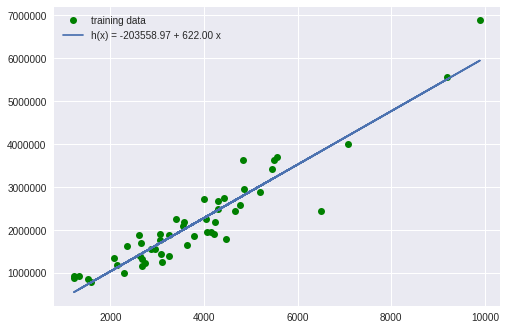

In [6]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, a[0] + a[1]*x, label='h(x) = %.2f + %.2f x' %(a[0], a[1]))
plt.legend();

To finish lets check the cost of an 8000 sqft house;

In [7]:
def h(x,a0,a1) :  # The model function h
    h = a0 + a1*x
    return h

In [8]:
print( '${:,.2f}'.format( h(8000,a[0],a[1]) ) )

$4,772,453.17


Indeed! I still can't afford it!

I hope the value of converting problems to matrix form is clear from this post. I feel it is much easier to work with matrix equations and it makes implementing efficient code straight forward. It's generally the case that having formulas in matrix form and using optimized mathematical libraries will give excellent performance. In anaconda Python numpy is compiled against Intel's excellent MKL (Math Kernel Library) this gives Python the potential for some of the performance capability of code built with lower level compiled compiled languages like C/C++ or Fortran.   

In the next post I'll finish up Linear Regression with a look at using non-linear feature variables (like polynomial regression). This will be a chance to illustrate the very important problem of over/under fitting data. 

**Happy computing! --dbk**  